# Random Forest
Random Forest é um tipo de algoritmo de classificação ou regressão, ou seja, seu objetivo é predizer a classe a que um dado pertence. E como o nome pode intuir ele usa uma floresta, no caso uma floresta de [árvores de decisão]("https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69"), que já foram explicadas anteriormente. Essas árvores são usadas para chegar ao resultado final do conjunto.

Essa random forest é uma técnica de [conjunto]("https://de.wikipedia.org/wiki/Ensemble_learning"), ou seja, ela usa múltiplos modelos preditivos menores, no caso árvores de decisão e a partir de suas múltiplas predições a floresta estabelece a sua predição final.

E com essa formação, podemos ter uma predição mais precisa pois assim o erro de uma árvore pode ser corrigido pelo resto da floresta.

Para criarmos uma [Random Forest]("https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleat%C3%B3ria-3545f6babdf8") temos que treinar cada árvore individualmente para enfim fazermos a floresta funcionar, que é o objetivo do algoritimo, ter varios votos com vieses diferentes para juntos termos o melhor resultado. 

Para treinarmos cada uma das árvores, precisamos realizar o Bootstrap, ou o [Bagging]("https://en.wikipedia.org/wiki/Bootstrap_aggregating"), que um processo de seleção de casos de treinamento, que são usados para treinar cada árvore individualmente.

O resultado dado pela floresta pode ser a predição mais frequente entre as árvores ou a média das predições:

$\hat{f} = \frac{1}{B}\sum_{b=1}^{B} f_b (x')$, onde $\hat{f}$ representa a média das árvores, B é o número de árvores, $f_b$ é a árvore treinada no bagging $b$ e $x'$ é um caso de teste.

Podemos também estimar a incerteza da predição a partir da fórmula do desvio padrão:

$\sigma = \sqrt{\frac{1}{B-1}\sum_{b=1}^{B}(f_b(x')-f)^2}$

Abaixo temos um exemplo de um pseudocódigo de uma random forest, em que n é menor que o total de exemplos, X são os atributos, Y sãos rótulos e f sãos as árvores a serem criadas. A primeira linha estabelece os conjuntos de dados. A segunda linha cria um laço de repetição que irá criar as árvores da floresta, criando um bag, e a partir dele treinando uma árvore f nele. Depois estabelece o resultado final a partir da floresta toda.

## Pseudocódigo:
Dado um conjunto de dados X = x¹, x², x³... e Y = y¹, y², y³...

Para b = 1, 2, 3, ...B, repita:
> Crie uma amostra bootstrap (X', Y') com n exemplos de (X, Y).


> Ajuste uma árvore de decisão $f_b$ para o conjunto de treinamento (X', Y'), utilizando m atributos para a escolha de cada nó.

Cria o modelo final: $\hat{f} = \frac{1}{B}\sum_{b=1}^{B} f_b (x')$, que calcula os votos obtidos por cada modelo $f_b$, que tem como classificação final a mais votada.


# Implementação

## Parâmetros

A seguir será mostrado como utilizar o código do sklearn para [random forest de classificação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) ela recebe diversos parâmetros para o algoritmo de predição vamos começar mostrando os principais parâmetros:


### n_estimators
Esse parâmetro é a forma de controlar a quantidade de árvores na floresta permitindo assim definir o custo do programa além de permitir caso necessário aumentar a precisão do programa. Isso muitas vezes não quer dizer necessariamente melhorar a acurácia, pois ao aumentar a quantidade de árvores pode ocorrer o problema de overfitting por existir árvores muito parecidas no programa.

### criterion 
Esse parâmetro define o critério utilizado pelas árvores de decisão na floresta que será utilizado para reduzir a impureza da árvore, permitindo uma maior liberdade no programa convergir, para certos casos e possível que um seja menos custoso ou mais preciso que os outros, porem isso varia de base para base. Os valores que a implementação do sklearn aceita seriam:
>“[gini]( https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity )” que tenta isolar um rotulo verificando o produto da probabilidade de em uma decisão, o que significa a chance de tal variável ficar isolada vezes a probabilidade dela não ficar isolada, pois se esse valor se aproxima de 0 o programa conseguiu isolar o atributo,

> “[entropy]( https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain)” que utiliza a variação da entropia como já mostrado em árvore de decisão.

### max_depth
O max_depth permite limitar a altura das árvores da floresta, o que permite limitar a complexidade da árvore, pois, ao limitar a altura também é limitada a quantidade possível de decisões na árvore o que permite impedir overfitting e diminuir o custo de memória do programa.

### max_leaf_nodes
Max_leaf_nodes limita a quantidade de folhas na árvore. Isso implica a limitação da quantidade de nós de decisão permitindo controle da complexidade, diminuição de custo, controle de overfitting e também de diminuir o custo operacional, porem é necessário ter cuidado para não causar underfitting.

### min_impurity_decrease
Essa variável define o valor mínimo de impureza para a transformação de uma folha em um nó, fazendo com que fique mais difícil da árvore fazer uma decisão ruim como overfitting, porém pode causar underfitting.

### bootstrap
Essa variável define se ocorre o bagging ou não, se ela for "false" todas as árvores são treinadas com o conjunto de treino inteiro, fazendo com que as árvores fiquem mais parecidas.

### oob_score
Essa variável define se o programa deve, pegar exemplos de dentro das bags para avaliar o programa. Ou seja o programa vai pegar alguns exemplos do conjunto de treinamento e misturar com o de teste para avaliar a predição, o que pode dar mais valor para o seu programa caso ele tenha recebido muitos outliers no conjunto de treinamento. Mas também ele poderia dar mais pontuação em um caso de overfitting.

### [random_state]( https://scikit-learn.org/stable/glossary.html#term-random-state)
Essa variável permite a repetibilidade do processo de predição, pois ao receber um número ele utilizara esse número como [semente](https://en.wikipedia.org/wiki/Random_seed) para a função de aleatoriedade do programa que seria o processo de bagging e de divisão da árvore. Porém quando em 'NONE' ele vai gerar um valor aleatório que será utilizado de semente o que impede que mesmo que tenha o data set e use os mesmos parâmetros tenha o mesmo resultado ao executar o programa.

### max_samples
Define o número máximo de exemplos a ser lido por cada estimador se o bootstrap for igual true. Ou seja, se o processo de bagging for permitido, esse valor indica o número máximo de exemplos em cada “bag”. Caso contrário ele diz quantos exemplos as árvores podem ler de todo o conjunto de treinamento.

## Métodos

Agora que já vimos os parâmetros vamos agora mostrar como utilizar a random forest do sklearn.


### [fit(X, y , sample_weight=None)]( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit)
Essa e a função de treinamento do algoritmo que recebe os atributos preditivos (X) e os rótulos (y) do conjunto de treinamento e a importância dos exemplos (sample_weight), com esses dados o algoritmo faz o processo de bagging com a variável X. Caso ele for permitido, pela variável bootstrap, formando n_estimators bags que são usados para treinar  n_estimators árvores na floresta aleatoriamente a partir da semente random_state. Com os pesos definidos por sample_weight que ajuda a definir os exemplos mais importantes para predição, possibilitando um ajuste caso a base seja desbalanceada.


### [predict(X)]( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict)
Essa e a função de utilizar o classificador para predizer a classe de cada termo da entrada passando eles por cada árvore da floresta e selecionando pra cada termo a classe mas votada para ele, e retorna um vetor com cada predição de rótulo na ordem de entrada.

### [apply(X)]( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.apply)
Essa função permite receber separadamente para cada elemento de X as predições feitas como se fosse usando a função predict de cada uma das árvores na floresta em um formato de matriz (quantidade de elementos em X, quantidade de árvores).

### [predict_proba(X)]( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba)
Parecida com a predict a predict_proba utiliza o estimador para predizer o rótulo de cada termo da entrada, porem diferentemente do predict que retorna um vetor com cada rótulo ele retorna uma matriz com a probabilidade de ser cada classe (quantidade de elementos em X, quantidade de classes).

### [score(X, y)]( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.score)
Essa e a função fornecida pela random forest do sklearn que permite uma auto avaliação do programa e retorna à acurácia media do processo de predição dos elementos X utilizando como base a variável y que seriam os rótulos de X.



# Aplicação

O hospital Albert Einstein, em São Paulo, disponibilizou uma [base de dados](https://www.kaggle.com/einsteindata4u/covid19) de pacientes anônimos que fizeram o teste para o COVID-19, a base possui diversos dados clínicos dos pacientes junto ao resultado dos testes feitos.

Para demonstrar o uso do algoritmo de classificação Random Forest em um problema real, a base do COVID-19 foi utilizada para treinar um classificador utilizando a implementação do algoritmo disponível na biblioteca sklearn. O classificador possui o intuito de prever a condição de pacientes com a doença utilizando seus dados clínicos como sinais, sintomas, testes de outras doenças, entre outras informações.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Importando o dataset do Covid-19.
data = pd.read_excel('dataset.xlsx')

# Mostra o número de pacientes e atributos antes das transformações feitas.
print(f'Número de pacientes: {data.shape[0]}')
print(f'Número de atributos: {data.shape[1]}')

Número de pacientes: 5644
Número de atributos: 111


Antes de utilizar o classificador, é necessário tratar os dados ausentes e os atributos desnecessários, em grande quantidade nesta base. Para isso selecionamos apenas os atributos que possuem dados presentes em mais de 20% dos pacientes, e selecionamos apenas os pacientes sem dados ausentes nesses atributos. Porcentagens mais altas que 20% selecionariam uma quantidade muito pequena de atributos, e mais baixas que 20% uma quantidade muito pequena de pacientes, inviabilizando a análise.

In [3]:
# Retira os atributos que possuem dados presentes em menos de 20% dos pacientes.
data_notnull = data.notnull().mean()*100
useful = data_notnull[data_notnull > 20]
data = data[[col for col in data.columns if col in useful]]

# Retira os pacientes que possuem algum dado ausente nos atributos selecionados.
data.dropna(subset=data.columns, inplace=True)

# Retira o atributo de identificação, irrelevante para a análise.
data.drop(columns=['Patient ID'], inplace=True)

# Transforma dados categóricos em numéricos.
data = data.replace({'positive': 1, 'negative': 0,
                     'detected': 1, 'not_detected': 0})

# Mostra a proporção de pacientes com e sem a doença na base de dados.
print(data['SARS-Cov-2 exam result'].value_counts(normalize=True))
print('-------------------------')

# Mostra o número de pacientes e atributos após as transformações feitas.
print(f'Número de pacientes: {data.shape[0]}')
print(f'Número de atributos: {data.shape[1]}')
print('-------------------------')

# Mostra os atributos selecionados.
print('Atributos selecionados:')
print(', '.join(list(data)))

0    0.91716
1    0.08284
Name: SARS-Cov-2 exam result, dtype: float64
-------------------------
Número de pacientes: 1352
Número de atributos: 22
-------------------------
Atributos selecionados:
Patient age quantile, SARS-Cov-2 exam result, Patient addmited to regular ward (1=yes, 0=no), Patient addmited to semi-intensive unit (1=yes, 0=no), Patient addmited to intensive care unit (1=yes, 0=no), Respiratory Syncytial Virus, Influenza A, Influenza B, Parainfluenza 1, CoronavirusNL63, Rhinovirus/Enterovirus, Coronavirus HKU1, Parainfluenza 3, Chlamydophila pneumoniae, Adenovirus, Parainfluenza 4, Coronavirus229E, CoronavirusOC43, Inf A H1N1 2009, Bordetella pertussis, Metapneumovirus, Parainfluenza 2


Uma vez com os dados tratados em mãos, separamos o rótulo e os atributos preditivos a serem considerados pelo classificador.

In [4]:
# Resultado do exame.
y = data['SARS-Cov-2 exam result']

# Dados clínicos selecionados, sem o resultado do exame.
X = data.drop(columns=['SARS-Cov-2 exam result'])

Para treinar e testar o classificador, dividimos a base de dados em duas, uma com 70% dos pacientes para treinamento, e outra com 30% dos pacientes para testes.

In [5]:
# 70% para treinamento e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Para gerar o classificador utilizamos o `RandomForestClassifier` da biblioteca sklearn, e alguns parâmetros descritos abaixo:

* __Quantidade de árvores__ (`n_estimators` = 100);
* __Semente da função de aleatoriedade__ (random_state=0)

In [6]:
classificador = RandomForestClassifier(n_estimators=100, random_state=0)

Com o método `fit` treinamos o classificador com os elementos de treino, e utilizamos o método `predict` para predizer os resultados dos elementos de teste, utilizando do classificador treinado:

In [7]:
classificador.fit(X_train, y_train)

y_pred = classificador.predict(X_test)

# Índices dos pacientes preditos com positivos pelo classificador.
print([i for i, val in enumerate(y_pred) if val])

[15, 111, 129, 187, 189, 244, 249, 292, 297, 348, 376]


É possível visualizar a predição de cada uma das árvores utilizando a função `apply`, que retorna uma matriz com os índices das folhas, onde cada linha representa uma amostra utilizada, e em cada coluna os índices das predições das amostras para uma árvore:

In [8]:
classificador.apply(X_test)

array([[  3,  40,   4, ...,  82,  10,   4],
       [ 99,  42, 124, ...,  84,  61,  52],
       [  3, 129,   4, ..., 117,  76,   4],
       ...,
       [ 61, 141,  96, ..., 125,  76, 103],
       [ 86,  96,  58, ...,  52,  50,  67],
       [ 73,  37,  50, ...,  39,  40,  45]])

## Resultados

Comparando os resultados obtidos com os de teste, podemos calcular a acurácia do classificador utilizando a função `score`:

In [9]:
acuracia = classificador.score(X_test, y_test)*100

print(f'Acurácia do classificador: {acuracia:.2f}%')

Acurácia do classificador: 93.35%


Devido a abordagem aleatória adotada pelo algoritmo Random Forest, utilizar do algoritmo múltiplas vezes pode não gerar resultados iguais:

In [10]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)
acuracia = classificador.score(X_test, y_test)*100
print(f'Acurácia do classificador: {acuracia:.2f}%')

Acurácia do classificador: 93.10%


O parâmetro `random_state` pode ser utilizado para gerar um classificador com as mesmas características, pois utilizando de uma mesma seed o vetor aleatório utilizado no processo de bagging é o mesmo:

In [11]:
classificador = RandomForestClassifier(n_estimators=100, random_state=0) # Mesmo valor utilizado
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)
acuracia = classificador.score(X_test, y_test)*100
print(f'Acurácia do classificador: {acuracia:.2f}%') # Mesma acurácia obtida

Acurácia do classificador: 93.35%


Apesar da acurácia alta nos testes feitos, em bancos de dados desbalanceados a acurácia pode não ser uma boa métrica para apurar sua eficiência. Para visualizar melhor os resultados, utilizamos uma [__matriz de confusão__](https://en.wikipedia.org/wiki/Confusion_matrix) e as métricas [__precision e recall__](https://en.wikipedia.org/wiki/Precision_and_recall):

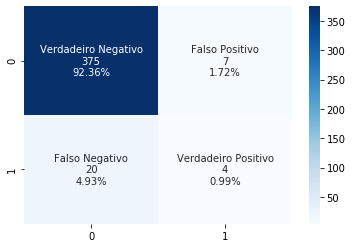

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Mostra a matriz de confusão dos resultados obtidos.
def show_confusion(y_test, y_pred):
        cf_matrix = confusion_matrix(y_test, y_pred)
        group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
        group_counts = ["{0:0.0f}".format(value) for value in
                        cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                  zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
        
show_confusion(y_test, y_pred)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       382
           1       0.36      0.17      0.23        24

    accuracy                           0.93       406
   macro avg       0.66      0.57      0.60       406
weighted avg       0.91      0.93      0.92       406



É possível perceber que apesar da acurácia alta, os valores de `precision` e `recall` para os resultados positivos são muito baixos, um resultado pouco desejado tendo em vista o contexto do classificador. Um valor baixo de `recall` mostra que o classificador errou a condição de grande parte dos pacientes com COVID-19 (Falso negativo), um resultado distante do ideal já que pacientes não alertados podem proliferar mais o vírus.

Para melhorar o `recall` é possível utilizar do parâmetro `sample_weight` e adicionar um peso maior para os pacientes com COVID-19. Dessa forma é possível aumentar o número de __verdadeiros positivos__ (pacientes com COVID-19 corretamente preditos pelo classificador), em detrimento de um aumento no número de __falsos positivos__ (pacientes sem COVID-19 erroneamente preditos pelo classificador) e de uma piora no valor da métrica `precision`:

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       382
           1       0.15      0.62      0.24        24

    accuracy                           0.76       406
   macro avg       0.56      0.70      0.55       406
weighted avg       0.92      0.76      0.82       406

Acurácia do classificador: 76.35%


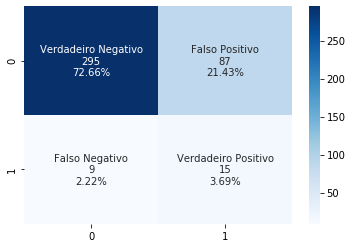

In [14]:
# Gera um vetor com pesos 1 para pacientes negativos e 10 para pacientes positivos para COVID-19.
pesos = [10 if i else 1 for i in y_train]

classificador = RandomForestClassifier(n_estimators=100, random_state=0)
classificador.fit(X_train, y_train, sample_weight=pesos)
y_pred = classificador.predict(X_test)
acuracia = classificador.score(X_test, y_test)*100

# Mostra as métricas.
print(classification_report(y_test, y_pred))
print(f'Acurácia do classificador: {acuracia:.2f}%')
show_confusion(y_test, y_pred)

A melhoria no `recall` causou um resultado pior na acurácia do classificador, aumentando muito a quantidade de falsos positivos e consequentemente abaixando o valor da métrica `precision`, porém exibindo melhores resultados em detectar pacientes com a doença em relação a abordagem anterior.